In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx

In [3]:
df=pd.read_csv("/content/drive/MyDrive/AI_Project/onlinefraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99195.000000,9.919500e+04,9.919500e+04,9.919500e+04,9.919500e+04,9.919500e+04,99195.000000,99195.0
mean,8.487464,1.731033e+05,8.821637e+05,8.986950e+05,8.801992e+05,1.183239e+06,0.001149,0.0
std,1.827906,3.433049e+05,2.682404e+06,2.720551e+06,2.402391e+06,2.803225e+06,0.033881,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.947775e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.249213e+04,2.006341e+04,0.000000e+00,2.085300e+04,4.947332e+04,0.000000,0.0
75%,10.000000,2.113356e+05,1.908507e+05,2.159766e+05,5.877320e+05,1.054337e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.400000e+07,3.890000e+07,1.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99195 entries, 0 to 99194
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            99195 non-null  int64  
 1   type            99195 non-null  object 
 2   amount          99195 non-null  float64
 3   nameOrig        99195 non-null  object 
 4   oldbalanceOrg   99195 non-null  float64
 5   newbalanceOrig  99195 non-null  float64
 6   nameDest        99195 non-null  object 
 7   oldbalanceDest  99195 non-null  float64
 8   newbalanceDest  99195 non-null  float64
 9   isFraud         99195 non-null  int64  
 10  isFlaggedFraud  99195 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.3+ MB


In [7]:
df["isFraud"].value_counts()

,count
isFraud,
0,99081
1,114


In [8]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
df.shape

(99195, 11)

In [10]:
df.type.value_counts()

,count
type,
PAYMENT,39204
CASH_OUT,30395
CASH_IN,20104
TRANSFER,8507
DEBIT,985


In [13]:
type=df['type'].value_counts()

/tmp/ipython-input-3485051941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette="muted")


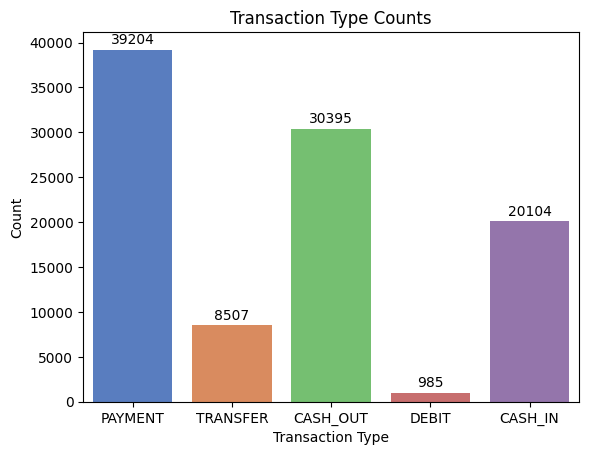

In [14]:
# Transaction type counts
ax = sns.countplot(x='type', data=df, palette="muted")
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Count")
ax.set_title("Transaction Type Counts")
for container in ax.containers:
    ax.bar_label(container, padding=2, color='black', fontsize=10)
plt.show()

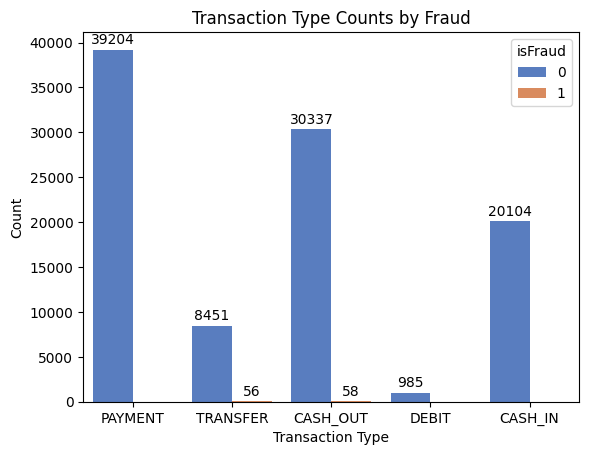

In [15]:
# Transaction type counts by fraud
ax = sns.countplot(x='type', hue='isFraud', data=df, palette="muted")
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Count")
ax.set_title("Transaction Type Counts by Fraud")
for container in ax.containers:
    ax.bar_label(container, padding=2, color='black', fontsize=10)
plt.show()

In [16]:
# Only encode categorical columns ONCE
le = LabelEncoder()
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


In [18]:
df.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.103309,0.075564,-0.000416,-0.002423,-0.002452,-0.096112,0.009424,0.011124,-0.052182,NaN
type,-0.103309,1.000000,0.103020,-0.001694,-0.378182,-0.392306,0.584350,-0.149040,-0.108273,0.015495,NaN
amount,0.075564,0.103020,1.000000,0.000567,-0.010934,-0.017294,-0.325854,0.246512,0.373377,0.036473,NaN
nameOrig,-0.000416,-0.001694,0.000567,1.000000,-0.002428,-0.002490,-0.000484,0.005254,0.004551,-0.002700,NaN
oldbalanceOrg,-0.002423,-0.378182,-0.010934,-0.002428,1.000000,0.998850,-0.183961,0.106763,0.075315,-0.004159,NaN
newbalanceOrig,-0.002452,-0.392306,-0.017294,-0.002490,0.998850,1.000000,-0.187224,0.108369,0.074260,-0.010836,NaN
nameDest,-0.096112,0.584350,-0.325854,-0.000484,-0.183961,-0.187224,1.000000,-0.251946,-0.290626,-0.021897,NaN
oldbalanceDest,0.009424,-0.149040,0.246512,0.005254,0.106763,0.108369,-0.251946,1.000000,0.938546,-0.009167,NaN
newbalanceDest,0.011124,-0.108273,0.373377,0.004551,0.075315,0.074260,-0.290626,0.938546,1.000000,-0.006267,NaN
isFraud,-0.052182,0.015495,0.036473,-0.002700,-0.004159,-0.010836,-0.021897,-0.009167,-0.006267,1.000000,NaN


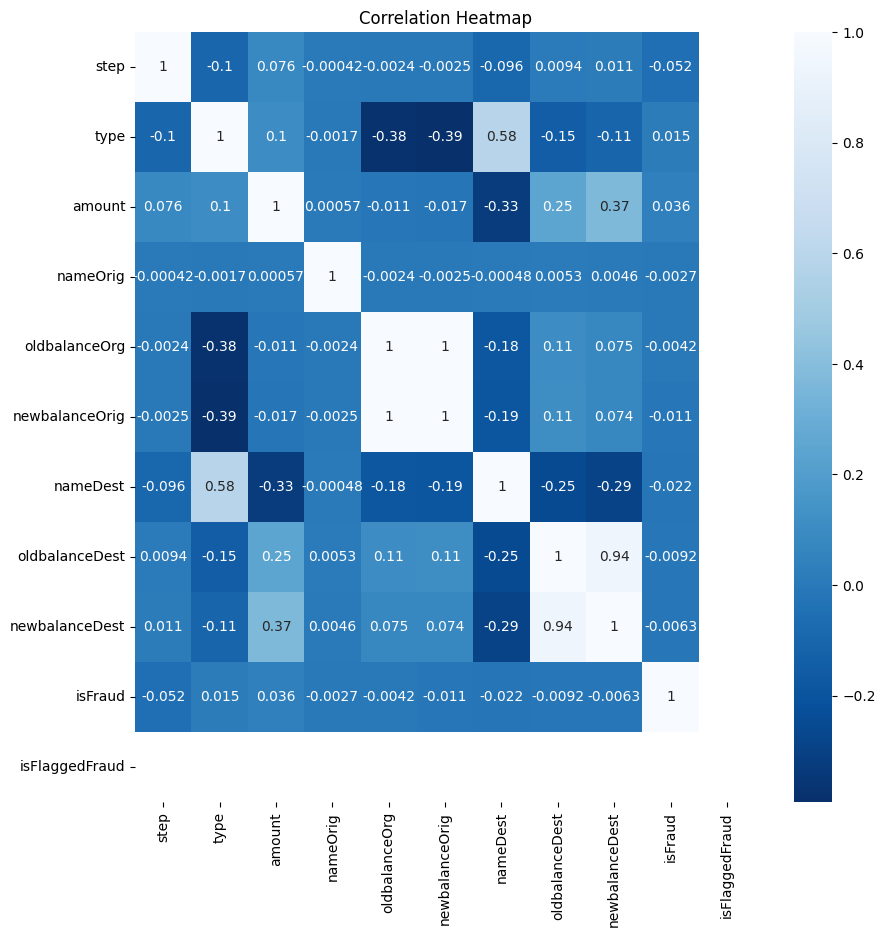

In [24]:
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues_r')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Drop NaNs if any
df = df.dropna()

# Graph Visualization for Fruad Transactions

Fraud Entities: 227
Fraud Transactions: 114


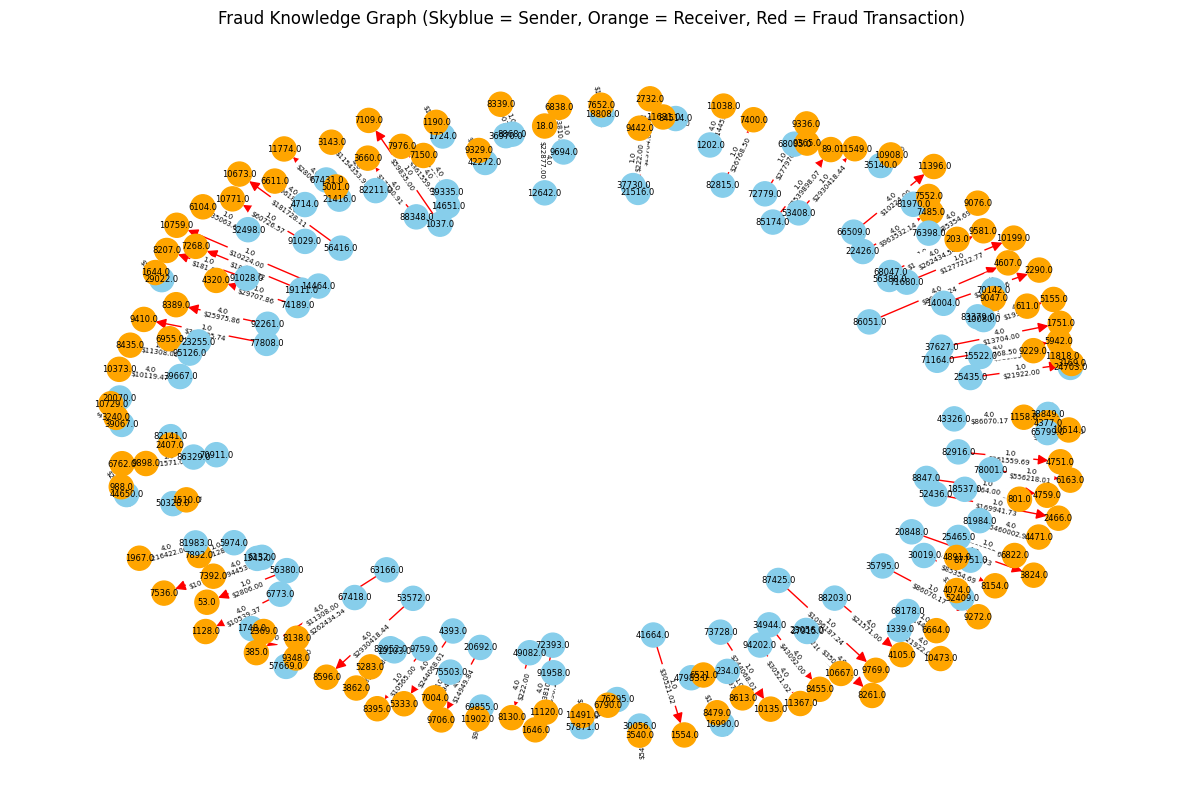

In [39]:
# Fraud transactions only
fraud_df = df[df['isFraud'] == 1]

# Initialize fraud KG
KG_fraud = nx.DiGraph()

# Build fraud knowledge graph
for _, row in fraud_df.iterrows():
    KG_fraud.add_node(row['nameOrig'], role='origin', balance=row['oldbalanceOrg'])
    KG_fraud.add_node(row['nameDest'], role='destination', balance=row['oldbalanceDest'])

    KG_fraud.add_edge(
        row['nameOrig'], row['nameDest'],
        relation='fraud_transfer',
        amount=row['amount'],
        transaction_type=row['type'],
        isFraud=row['isFraud']
    )

print(f"Fraud Entities: {KG_fraud.number_of_nodes()}")
print(f"Fraud Transactions: {KG_fraud.number_of_edges()}")

# Node colors by role
node_colors = [
    'skyblue' if KG_fraud.nodes[n]['role']=='origin' else 'orange'
    for n in KG_fraud.nodes
]

# All fraud edges = red
edge_colors = ['red' for u,v in KG_fraud.edges]

# Layout
pos = nx.spring_layout(KG_fraud, seed=42)

plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(KG_fraud, pos, node_color=node_colors, node_size=300)
nx.draw_networkx_edges(KG_fraud, pos, edge_color=edge_colors, arrowsize=15)
nx.draw_networkx_labels(KG_fraud, pos, font_size=6)

# Edge labels = type + amount
edge_labels = {
    (u,v): f"{KG_fraud[u][v]['transaction_type']}\n${KG_fraud[u][v]['amount']:.2f}"
    for u,v in KG_fraud.edges
}
nx.draw_networkx_edge_labels(KG_fraud, pos, edge_labels=edge_labels, font_size=5)

plt.title("Fraud Knowledge Graph (Skyblue = Sender, Orange = Receiver, Red = Fraud Transaction)")
plt.axis('off')
plt.show()

In [28]:
x = df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y = df['isFraud']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
!pip install imbalanced-learn tensorflow
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 isFraud
0    79268
1       88
Name: count, dtype: int64

After SMOTE:
 isFraud
0    79268
1    79268
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7659 - loss: 0.5041
Epoch 2/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8451 - loss: 0.3576
Epoch 3/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8707 - loss: 0.2987
Epoch 4/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8521 - loss: 0.3820
Epoch 5/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9053 - loss: 0.2651
Epoch 6/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8678 - loss: 0.3250
Epoch 7/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8779 - loss: 0.2927
Epoch 8/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8515 - loss: 0.3226
Epoch 9/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9275 - loss: 0.2133
Epoch 10/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8689 - loss: 0.2647
Epoch 11/50
4955/4955 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8847 - loss: 0.3089
Epoch 12/50
4955/4955

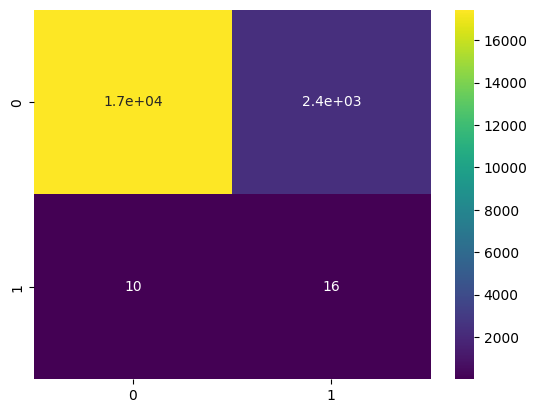

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='sigmoid', input_dim=x_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train_res, y_train_res, epochs=50, batch_size=32, verbose=1)

y_prob = model.predict(x_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')
plt.show()

In [32]:
type_map = {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

def predict_transaction(model):
    print("\nSelect Transaction Type:")
    for i, t in enumerate(type_map.keys()):
        print(f"{i+1}. {t}")

    choice = int(input("Enter choice number: "))
    if choice < 1 or choice > len(type_map):
        print("❌ Invalid choice!")
        return

    ttype = list(type_map.keys())[choice-1]
    ttype_encoded = type_map[ttype]

    amount = float(input("Amount: "))
    oldbalanceOrg = float(input("Old Balance (Origin): "))
    newbalanceOrig = float(input("New Balance (Origin): "))
    oldbalanceDest = float(input("Old Balance (Destination): "))
    newbalanceDest = float(input("New Balance (Destination): "))

    sample = np.array([[ttype_encoded, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest]])
    prob = model.predict(sample)[0][0]
    pred = int(prob > 0.5)

    if pred == 1:
        print(f"\n🚨 Fraud Detected (probability = {prob:.4f})")
    else:
        print(f"\n✅ Not Fraud (probability = {prob:.4f})")

In [33]:
predict_transaction(model)


Select Transaction Type:
1. CASH_IN
2. CASH_OUT
3. DEBIT
4. PAYMENT
5. TRANSFER
Enter choice number: 5
Amount: 2434
Old Balance (Origin): 878768
New Balance (Origin): 465454
Old Balance (Destination): 56787687
New Balance (Destination): 77667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

🚨 Fraud Detected (probability = 0.9820)


In [34]:
# Save ANN model
model.save("/content/drive/MyDrive/AI_Project/fraud_model.h5")

# Save type_map dictionary
import pickle

type_map = {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}
with open("/content/drive/MyDrive/AI_Project/type_map.pkl", "wb") as f:
    pickle.dump(type_map, f)